<a href="https://colab.research.google.com/github/AureliaWambui19/Houses-Prediction/blob/main/wambui_aurelia_core_week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Introduction

> 
Am a Data Scientist working for Hass Consulting Company which is a real estate leader with over 25 years of experience. I have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 


## 1.2Metrics for success

Successfully building 5 models
Selecting the most effective of the model to help in price prediction

## 1.3Context

Dataset

The dataset to use for this project can be found by following this link: [http://bit.ly/IndependentProjectWeek7Dataset (Links to an external site.)]. 

Below is the dataset glossary:

Id 
price  - Price of the house

bedrooms - Number of Bedrooms

bathrooms - Number of Bathrooms

sqft_living - Square feet area of living area

sqft_lot  - Square feet area of parking Layout

floors - Number of Floors

waterfront - Whether waterfront is there or not

view - Number of Views

grade - Grades

sqft_above

sqft_basement - Square feet area off basement

yr_built - Year the house is built

yr_renovated - Year the house is renovated

zipcode - zipcode os the house

lat : Latitude of the house

lon : Longitude of the house

sqft_living15

sqft_lot15

## 1.4 Experimental design

Define the question, the metric for success, the context, experimental design taken.
Read and explore the given dataset.

Define the appropriateness of the available data to answer the given question.

Find and deal with outliers, anomalies, and missing data within the dataset.

Perform univariate, bivariate and multivariate analysis recording your observations.

Performing regression analysis.

Check for multicollinearity

Provide a recommendation based on your analysis. 

Create residual plots for your models, and assess heteroskedasticity using Barlett's test.

Challenge your solution by providing insights on how you can make improvements in model improvement.

## 1.5 Appropriatness of data

The data provided is appropriate as it details information relevant to the above question for this project

# 2.Data Undertanding

## 2.1Importing libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,  r2_score 
from sklearn import metrics
import scipy as sp
from sklearn.linear_model import Ridge, Lasso, ElasticNet

import statsmodels.formula.api as smf

## 2.2 Load the dataset

In [7]:
home= pd.read_csv('house.csv')

## 2.3Checking the Data

In [8]:
# Determining number of records in the dataset
rows = home.shape[0]
columns = home.shape[1]
print(f'{rows} rows \n {columns} columns')

21613 rows 
 20 columns


In [10]:
#Previewing the head of the dataset
home.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#Previewing the tail of the dataset
home.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [11]:
# Checking dataset information
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [12]:
# Checking whether each column has an appropriate datatype
home.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [13]:
#Checking for Number of Unique Values in each column
home.nunique()

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [14]:
# Checking the columns in the dataset
home.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

#3 Data preparation

##3.1 Missing Values

In [15]:
#Checking for null values
home.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

##3.2Duplicates

In [16]:
#Checking for Duplicates
home.duplicated().sum()

3

In [17]:
# dropping the duplicates
home.drop_duplicates(inplace = True)

In [18]:
# Checking that we have no duplicates in the data
home.duplicated().sum()

0

##3.3 Changing the datatypes of some columns 

In [19]:
home['bathrooms'] = home.bathrooms.astype(int)

In [20]:
home['floors'] = home.floors.astype(int)

In [21]:
home['price'] = home.price.astype(int)

In [22]:
home.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [39]:
home.dtypes

id                 int64
price              int64
bedrooms           int64
bathrooms          int64
sqft_living        int64
sqft_lot           int64
floors             int64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

##3.5 Outliers

In [26]:
home.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

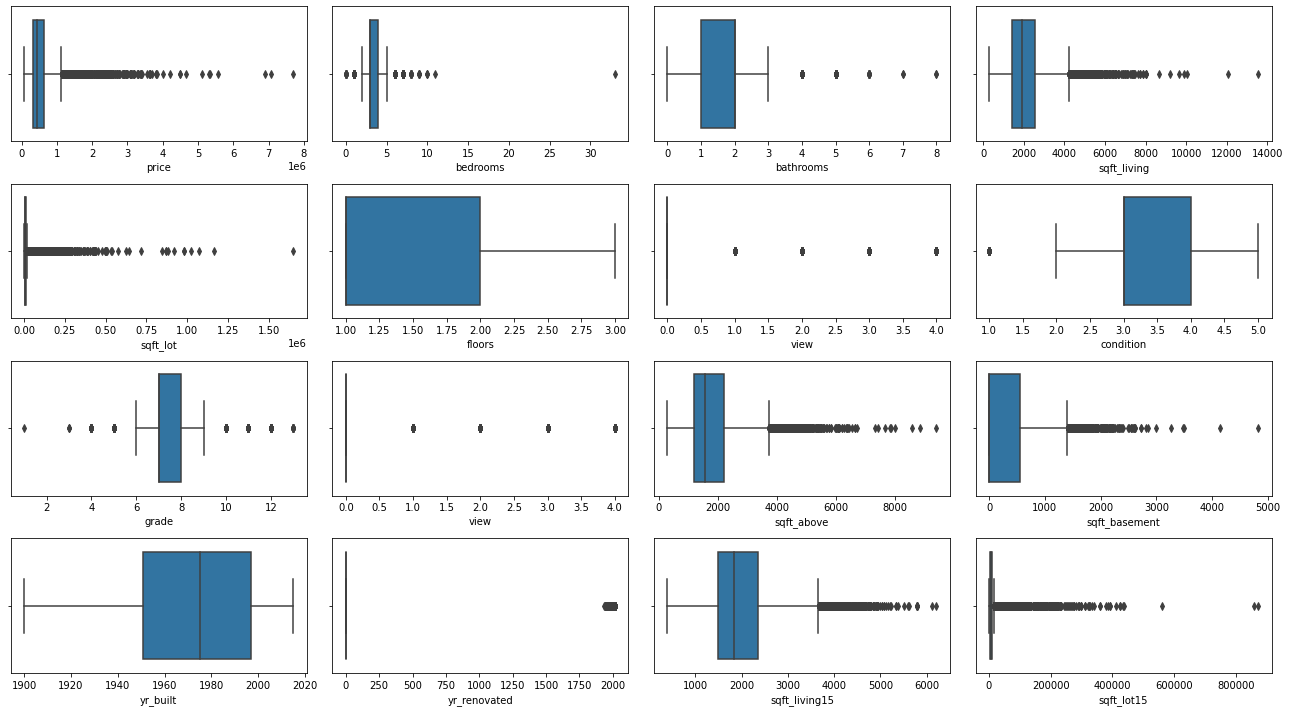

In [28]:
fig, ((ax1, ax2,ax3,ax4), (ax5, ax6,ax7,ax8),(ax9, ax10,ax11,ax12),(ax13,ax14,ax15,ax16))  = plt.subplots(4,4, figsize=(18, 10))

sns.boxplot(home['price'], ax=ax1)
sns.boxplot(home['bedrooms'], ax=ax2)
sns.boxplot(home['bathrooms'], ax=ax3)
sns.boxplot(home['sqft_living'], ax=ax4)
sns.boxplot(home['sqft_lot'], ax=ax5)
sns.boxplot(home['floors'], ax=ax6)
sns.boxplot(home['view'], ax=ax7)
sns.boxplot(home['condition'], ax=ax8)
sns.boxplot(home['grade'], ax=ax9)
sns.boxplot(home['view'], ax=ax10)
sns.boxplot(home['sqft_above'], ax=ax11)
sns.boxplot(home['sqft_basement'], ax=ax12)
sns.boxplot(home['yr_built'], ax=ax13)
sns.boxplot(home['yr_renovated'], ax=ax14)
sns.boxplot(home['sqft_living15'], ax=ax15)
sns.boxplot(home3.10.['sqft_lot15'], ax=ax16)
plt.tight_layout()
plt.show()




There are outliers but i chose for them to remain so as not to affect the dataset

# 4,0Exploratory Data Analysis

##4.1 Univariate

In [29]:
home.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

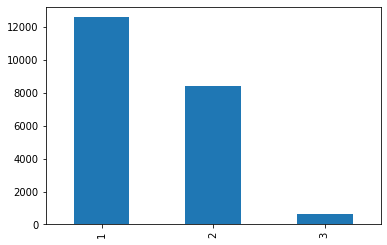

In [30]:
home['floors'].value_counts().plot(kind='bar')

Most  houses had one floor

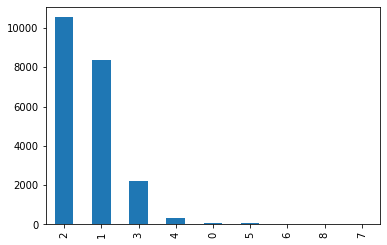

In [31]:
home['bathrooms'].value_counts().plot(kind='bar')

most houses had 2 bathrooms

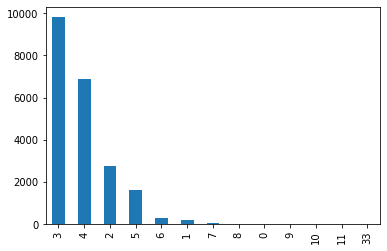

In [32]:
home['bedrooms'].value_counts().plot(kind='bar')

most houses had 3 bathrooms 

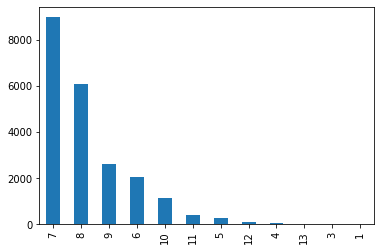

In [33]:
home['grade'].value_counts().plot(kind='bar')

most houses were of the 7th grade

In [35]:
houseuni = home.drop(['id', 'lat', 'long', 'zipcode'], axis=1)
houseuni.mean()



price            540178.944840
bedrooms              3.370847
bathrooms             1.749745
sqft_living        2079.881212
sqft_lot          15108.289820
floors                1.446136
waterfront            0.007543
view                  0.234197
condition             3.409440
grade                 7.656779
sqft_above         1788.347894
sqft_basement       291.533318
yr_built           1971.003609
yr_renovated         84.322351
sqft_living15      1986.518695
sqft_lot15        12769.031976
dtype: float64

On average the square living size  of houses is  2079.881212401666

on average the square ft above of the houses is  1788.3478944932901

In [37]:
houseuni = home.drop(['id','lat', 'long', 'zipcode'], axis=1)

houseuni.max()

price            7700000
bedrooms              33
bathrooms              8
sqft_living        13540
sqft_lot         1651359
floors                 3
waterfront             1
view                   4
condition              5
grade                 13
sqft_above          9410
sqft_basement       4820
yr_built            2015
yr_renovated        2015
sqft_living15       6210
sqft_lot15        871200
dtype: int64

The most expensive house retails at  7700000 .
The latest year when a house was built was 2015.Then year of latest renovation was also 2015

In [ ]:
houseuni= home.drop(['id','lat', 'long'], axis=1)
houseuni.min()


price             75000
bedrooms              0
bathrooms             0
sqft_living         290
sqft_lot            520
floors                1
waterfront            0
view                  0
condition             1
grade                 1
sqft_above          290
sqft_basement         0
yr_built           1900
yr_renovated          0
zipcode           98001
sqft_living15       399
sqft_lot15          651
city             Auburn
dtype: object

The cheapest price of a house is 75000.0
The smallest value for sqft living and sqft lot is 399 and 651 respectively


## 4.2Bivariate

In [38]:
housebiv=home.drop(['id','lat', 'long'],axis=1)
housebiv.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,1800,7503


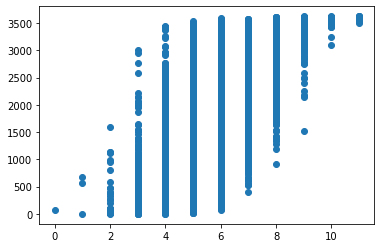

In [326]:
# plottimg scatter plot to show relationship between grade and price
plt.scatter(x=df['grade'],y=df['price'] )

As the grade of the house increases so does the house

## 4.3Multivariate

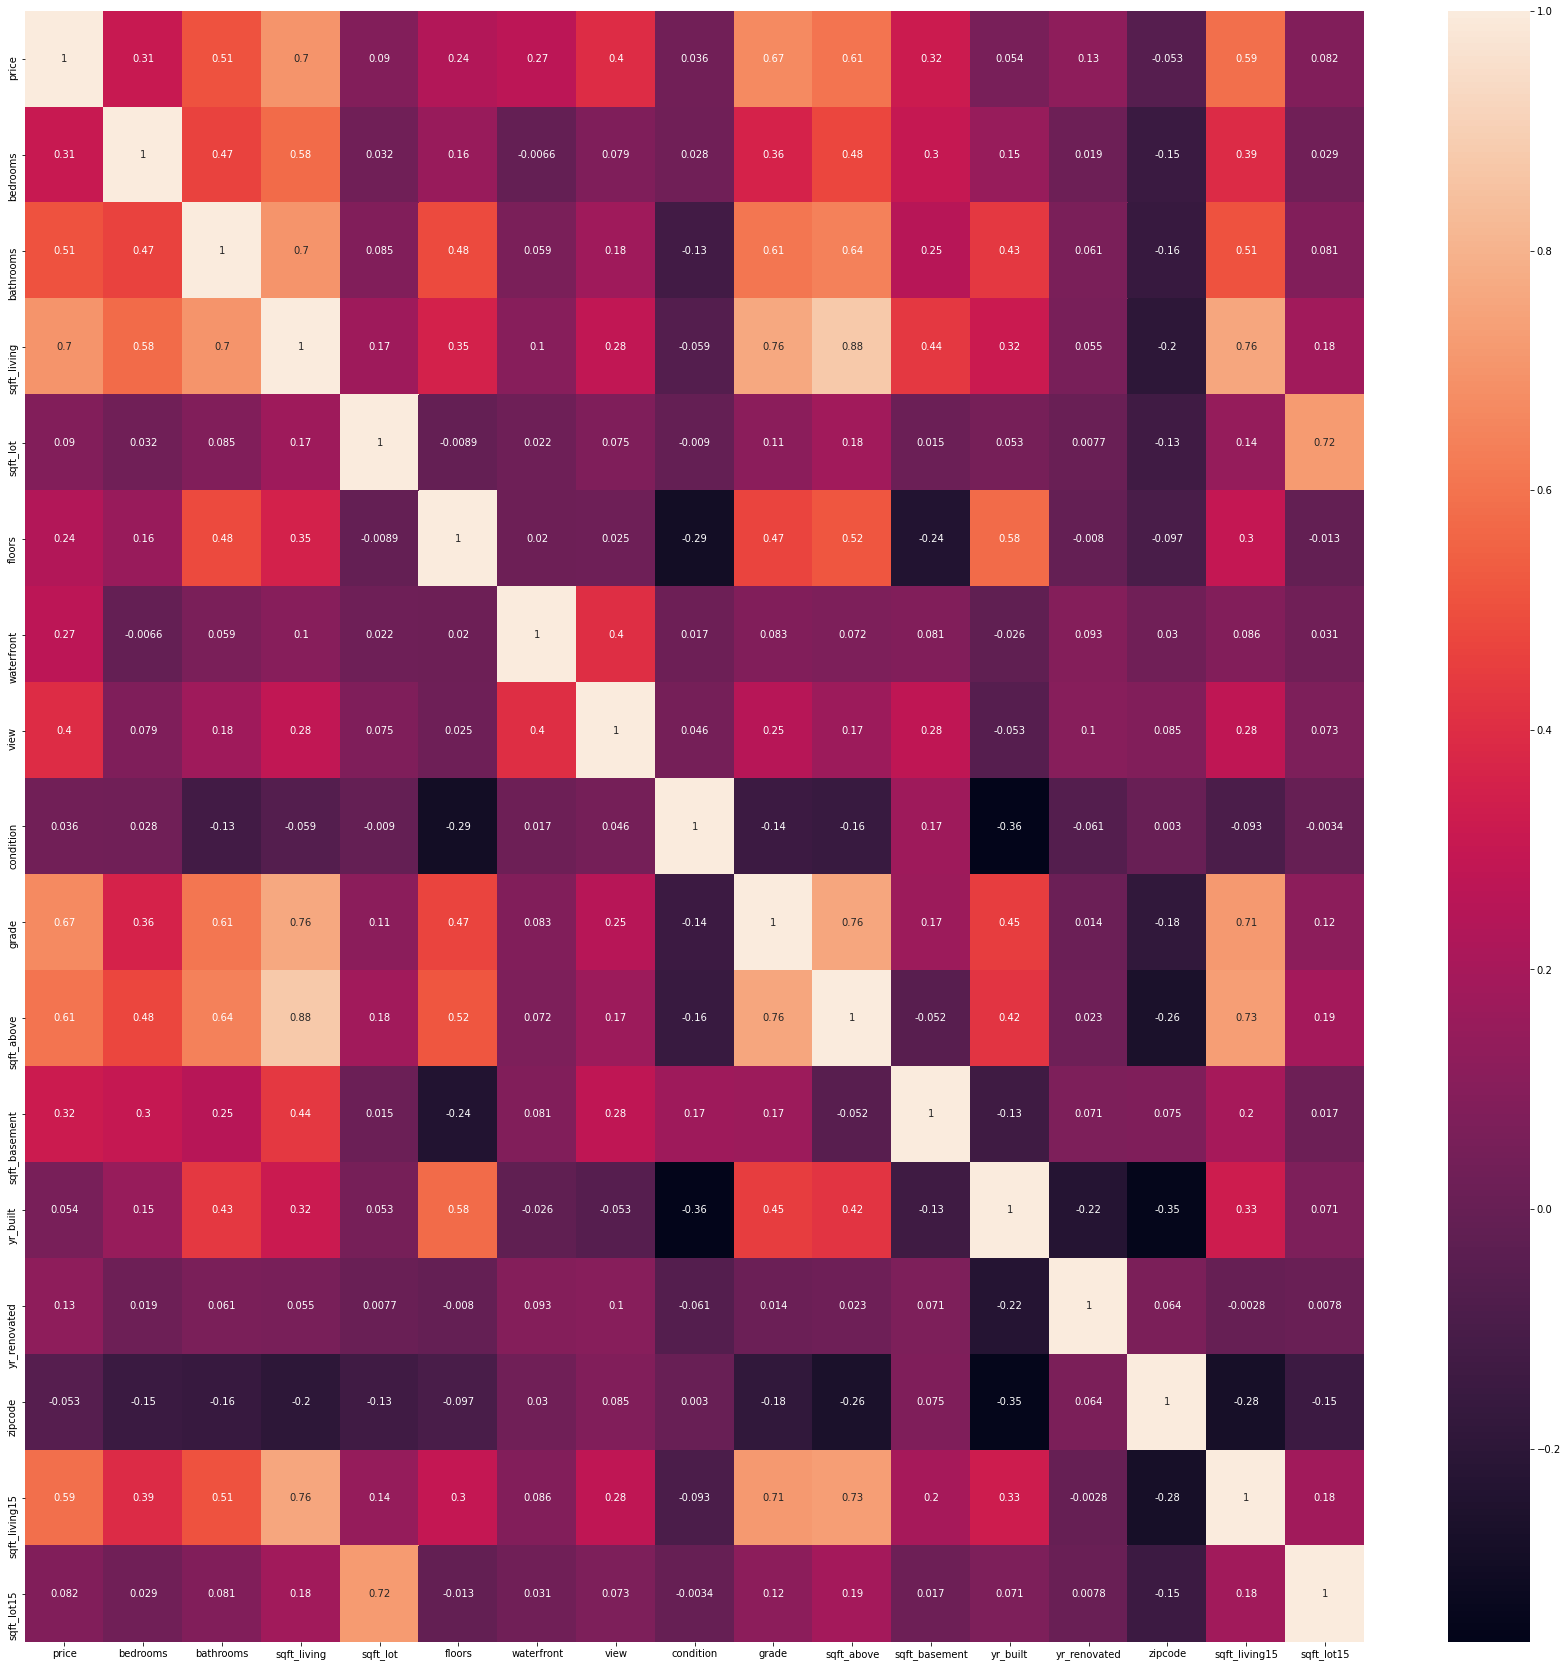

In [40]:
plt.subplots(figsize=(30,30))
sns.heatmap(housebiv.corr(),annot=True)

some features are highly positively correlated eg sqft_above and sqft*-living  with a correlation of 0.88
some features are weakly  positively correlated eg year renovated  and grade of a house  with a correlation of 0.0014
others have a negative correlation eg year buily and year renovated


In [41]:
housebiv.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.308346,0.510096,0.702046,0.089658,0.237215,0.266332,0.397466,0.036397,0.667478,0.605569,0.323849,0.053980,0.126503,-0.053162,0.585382,0.082457
bedrooms,0.308346,1.000000,0.467519,0.576674,0.031699,0.155663,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077,0.154276,0.018695,-0.152721,0.391633,0.029233
bathrooms,0.510096,0.467519,1.000000,0.697914,0.085313,0.484886,0.058799,0.177497,-0.125962,0.606661,0.639963,0.250920,0.433608,0.060698,-0.159755,0.510106,0.080794
sqft_living,0.702046,0.576674,0.697914,1.000000,0.172830,0.353327,0.103820,0.284641,-0.058768,0.762719,0.876600,0.435054,0.318099,0.055314,-0.199435,0.756420,0.183285
sqft_lot,0.089658,0.031699,0.085313,0.172830,1.000000,-0.008919,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271,0.053105,0.007677,-0.129611,0.144620,0.718556
floors,0.237215,0.155663,0.484886,0.353327,-0.008919,1.000000,0.019654,0.024528,-0.293188,0.472577,0.517903,-0.235802,0.578663,-0.007979,-0.096645,0.296537,-0.013232
waterfront,0.266332,-0.006583,0.058799,0.103820,0.021601,0.019654,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585,-0.026159,0.092950,0.030277,0.086469,0.030702
view,0.397466,0.079433,0.177497,0.284641,0.074753,0.024528,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996,-0.053229,0.103208,0.084838,0.280404,0.072577
condition,0.036397,0.028422,-0.125962,-0.058768,-0.008967,-0.293188,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071,-0.361347,-0.060862,0.002962,-0.092854,-0.003424
grade,0.667478,0.357003,0.606661,0.762719,0.113644,0.472577,0.082785,0.251378,-0.144655,1.000000,0.755919,0.168443,0.446966,0.014372,-0.184795,0.713208,0.119265


#5 Multicollinearity 



In [42]:
housem=home.copy()
housem

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000,3,2,1530,1131,3,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000,4,2,2310,5813,2,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101,2,0,1020,1350,2,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000,3,2,1600,2388,2,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [43]:
# Encoding the categorical columns 
#
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
housem =housem.apply(le.fit_transform)

In [44]:
housem.head(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15339,349,3,1,109,2535,0,0,0,2,5,123,0,55,0,66,2398,223,109,2164
1,14466,2091,3,2,506,3578,1,0,0,2,5,395,56,51,45,55,4478,161,208,3470


In [45]:
correlation = housem.corr()
correlation

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.000433,0.003036,-0.001864,-0.007692,-0.132920,0.016424,-0.003567,0.012715,-0.021598,0.007731,-0.008839,-0.002122,0.019188,-0.015350,-0.006380,-0.002298,0.015317,-0.002403,-0.129253
price,0.000433,1.000000,0.340194,0.476042,0.672278,0.119068,0.280358,0.122941,0.307818,0.037854,0.676963,0.575311,0.289069,0.068400,0.115796,-0.014613,0.467980,0.064044,0.604665,0.107793
bedrooms,0.003036,0.340194,1.000000,0.478991,0.607942,0.194786,0.159983,-0.006636,0.081524,0.026443,0.365457,0.491274,0.307178,0.158575,0.029051,-0.155832,-0.011218,0.138122,0.407314,0.177666
bathrooms,-0.001864,0.476042,0.478991,1.000000,0.679410,0.088250,0.484886,0.058799,0.177497,-0.125962,0.606692,0.626466,0.241525,0.433608,0.074072,-0.149897,0.030325,0.184822,0.501519,0.080153
sqft_living,-0.007692,0.672278,0.607942,0.679410,1.000000,0.339110,0.362667,0.087241,0.265243,-0.058291,0.752385,0.864306,0.412695,0.330178,0.062730,-0.196734,0.047716,0.259488,0.765149,0.319284
sqft_lot,-0.132920,0.119068,0.194786,0.088250,0.339110,1.000000,-0.198239,0.092938,0.132915,0.076393,0.217416,0.309572,0.107137,0.040848,0.008438,-0.311335,-0.129700,0.364203,0.383079,0.922510
floors,0.016424,0.280358,0.159983,0.484886,0.362667,-0.198239,1.000000,0.019654,0.024528,-0.293188,0.472643,0.539814,-0.243083,0.578663,-0.005136,-0.076054,0.028434,0.162706,0.299948,-0.188059
waterfront,-0.003567,0.122941,-0.006636,0.058799,0.087241,0.092938,0.019654,1.000000,0.401993,0.016652,0.082798,0.065349,0.072785,-0.026159,0.073731,0.029114,-0.015472,-0.040622,0.085077,0.101411
view,0.012715,0.307818,0.081524,0.177497,0.265243,0.132915,0.024528,0.401993,1.000000,0.045836,0.251417,0.158330,0.268505,-0.053229,0.093469,0.071338,0.006302,-0.079161,0.275185,0.131601
condition,-0.021598,0.037854,0.026443,-0.125962,-0.058291,0.076393,-0.293188,0.016652,0.045836,1.000000,-0.144830,-0.166535,0.177970,-0.361347,-0.075544,-0.006397,-0.013041,-0.106821,-0.092336,0.080645


some features are highly positively correlated eg sqft_above and sqft*-living  with a correlation of 0.88
some features are weakly  positively correlated eg year renovated  and grade of a house  with a correlation of 0.0014
others have a negative correlation eg year buily and year renovated


In [46]:
# checking for multicollinearity
# Using the variance Inflation Factor (VIF)
# 
# This is calculated using linear algebra inverse function

pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns = correlation.columns)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.031246,0.033467,-0.018513,0.030932,-0.135041,0.137225,0.064238,-0.006319,-0.038242,0.011735,-0.055875,0.101934,0.057511,0.007003,0.010941,0.025588,0.004512,-0.075194,-0.032315,0.089333
price,0.033467,4.008550,0.134796,-0.147141,-2.778568,0.045969,-0.172386,-0.119946,-0.328319,-0.314932,-1.389557,1.365277,0.774469,0.792133,-0.139833,0.238211,-1.526910,-0.017303,-0.616707,0.367269
bedrooms,-0.018513,0.134796,1.729968,-0.342229,-1.514685,0.015974,0.093683,0.049968,0.102117,-0.062459,0.260369,0.241042,0.116455,0.077197,0.027320,0.108221,-0.016044,0.063336,0.067781,0.014097
bathrooms,0.030932,-0.147141,-0.342229,2.390946,0.862365,0.042018,-0.408711,-0.000643,-0.036799,-0.041145,-0.198555,-1.661301,-1.072179,-0.454747,-0.163920,0.007191,0.041080,0.008951,0.141471,0.121746
sqft_living,-0.135041,-2.778568,-1.514685,0.862365,68.569488,-0.504782,0.566441,0.295429,0.868633,-0.240077,1.407384,-59.981151,-32.424027,-1.294861,-0.192670,-0.590568,0.893030,0.056146,-1.674663,0.125325
sqft_lot,0.137225,0.045969,0.015974,0.042018,-0.504782,7.114023,0.462623,0.014158,-0.065555,0.101808,0.039332,-0.426361,0.021944,0.287247,0.073233,0.064389,0.114411,-0.250733,0.194604,-6.162730
floors,0.064238,-0.172386,0.093683,-0.408711,0.566441,0.462623,2.525110,-0.042029,-0.045825,0.056222,-0.144987,-1.350424,0.215657,-0.949002,-0.125794,-0.099933,-0.029410,0.084443,0.129530,0.270404
waterfront,-0.006319,-0.119946,0.049968,-0.000643,0.295429,0.014158,-0.042029,1.212677,-0.476921,0.001983,0.086698,-0.290614,-0.114553,-0.032312,-0.040095,-0.008387,0.052491,0.044111,0.079414,-0.136167
view,-0.038242,-0.328319,0.102117,-0.036799,0.868633,-0.065555,-0.045825,-0.476921,1.462732,0.005090,-0.074156,-0.637912,-0.621932,0.097522,-0.020854,-0.147210,0.239647,0.096565,-0.276592,-0.041999
condition,0.011735,-0.314932,-0.062459,-0.041145,-0.240077,0.101808,0.056222,0.001983,0.005090,1.280111,0.053710,0.331866,0.021921,0.467276,0.223336,0.130053,0.174572,-0.005172,0.147871,-0.197734


Interpreting the table is straightforward: The VIF score for each variable is found alongside the downwards sloping diagonal. 

some features have a very high vif (vif greater than 5 is considered highly correlated)
sqftliving has 68.56
sqftlot has 7.11
sqftabove has 57.95
sqftbasement has 17.31
sqftlot15 has 7.03



In [47]:
housemcrevise = housem.drop(columns=['sqft_living','sqft_lot','sqft_above','sqft_basement', 'sqft_lot15'])

correlation = housemcrevise.corr()
pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)

,id,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
id,1.001927,-0.009725,-0.011379,0.020711,-0.013628,0.010184,-0.026523,0.020746,-0.010260,-0.005269,0.016345,0.001916,0.002616,-0.018340,0.030832
price,-0.009725,3.597018,-0.171758,-0.368683,-0.296084,-0.086078,-0.295419,-0.301928,-1.519103,0.758102,-0.143623,0.136723,-1.381586,0.025503,-0.871630
bedrooms,-0.011379,-0.171758,1.417586,-0.578842,0.111246,0.050445,0.093975,-0.069528,0.022420,0.071378,0.012462,0.053936,0.116511,0.019051,-0.289555
bathrooms,0.020711,-0.368683,-0.578842,2.116143,-0.390163,0.005884,-0.089249,-0.045097,-0.405966,-0.438893,-0.171051,-0.039582,0.118420,0.035517,-0.062114
floors,-0.013628,-0.296084,0.111246,-0.390163,1.845327,-0.022276,0.106503,0.161235,-0.242496,-0.868492,-0.083280,-0.170061,0.055419,0.071598,0.149970
waterfront,0.010184,-0.086078,0.050445,0.005884,-0.022276,1.200547,-0.480168,-0.000794,0.046122,-0.020453,-0.042640,0.006716,0.053190,0.005472,0.037318
view,-0.026523,-0.295419,0.093975,-0.089249,0.106503,-0.480168,1.406903,-0.017834,-0.075836,0.090838,-0.028894,-0.133260,0.211784,0.122278,-0.260795
condition,0.020746,-0.301928,-0.069528,-0.045097,0.161235,-0.000794,-0.017834,1.259206,0.072492,0.443547,0.213915,0.138671,0.159044,0.004870,0.137034
grade,-0.010260,-1.519103,0.022420,-0.405966,-0.242496,0.046122,-0.075836,0.072492,3.378832,-0.801713,-0.039178,0.002407,0.308567,0.246011,-0.993017
yr_built,-0.005269,0.758102,0.071378,-0.438893,-0.868492,-0.020453,0.090838,0.443547,-0.801713,2.552835,0.456543,0.294997,-0.009984,-0.487263,-0.027719


# 6 Multiple regression

In [49]:
housesm=home.drop(columns=['id','sqft_living','sqft_lot','sqft_above','sqft_basement', 'sqft_lot15', 'lat','long'])
housesm.columns


Index(['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode',
       'sqft_living15'],
      dtype='object')

We shall use the above  columns for our regression analysis

In [50]:
# price is our independent variable 
x = housesm.drop('price', axis = 1)
y = housesm['price']



In [52]:
# Initialise the Scaler 
scaler = StandardScaler() 
  
# To scale data 
scaler.fit(housem) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [53]:
# Train using 80% of the data.

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)


In [54]:
# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
# checking coefficients used by our model, as they indicate how heavily each independent variable contributes to the dependent variable
coef_dict_baseline = {}
for coef, feat in zip(regressor.coef_,x.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 105936.96479314416,
 'bedrooms': -3050.3492723563236,
 'condition': 25211.448779297833,
 'floors': 16984.190697305425,
 'grade': 160009.1421829856,
 'sqft_living15': 92.21222091243544,
 'view': 50186.0538809661,
 'waterfront': 683077.1167748966,
 'yr_built': -3804.410867753865,
 'yr_renovated': 15.492098763810645,
 'zipcode': 36.24868329552692}

waterfrnt  is the highest important predictor ,followed by floors
the least predictor is the yr built

In [55]:
# predicting and evaluation of the model
y_pred = regressor.predict(xtest)

print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))

Mean Absolute Error: 143639.86974615254
Mean Squared Error: 48369833292.21715
Root Mean Squared Error: 219931.4286140504


In [58]:
# We now create the residual by subtracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, ytest)



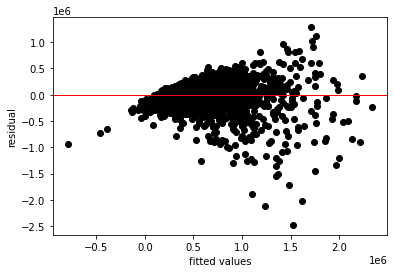

In [59]:
# Visualizing the residuals using a scatter plot 

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [60]:
# Carrying out Barlett's test 
# It is a more thorough heteroskedasticity test.

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value


critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('The variances are Homogeneous!')

2.038088754762586e-88
The variances are Homogeneous!


# 7 Ridge regression

In [61]:
## training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(xtrain,ytrain)


Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [62]:
# checking coefficients used by our model, as they indicate how heavily each independent variable contributes to the dependent variable
coef_dict_baseline = {}
for coef, feat in zip(ridgeReg.coef_,x.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 101284.58862523928,
 'bedrooms': 744.5548107147495,
 'condition': 27971.562771149733,
 'floors': 16599.460783389462,
 'grade': 145023.17030498633,
 'sqft_living15': 99.80503007740273,
 'view': 53325.628089547434,
 'waterfront': 652843.743384748,
 'yr_built': -3310.7781265804824,
 'yr_renovated': 23.38591551748775,
 'zipcode': 84.89084150531556}

waterfront is the predictor with the highest influence on the dependent variable,followed by floors and the least is yr built...
this results are the same as those observed by using multiple regression

In [63]:
# predicting and evaluation of the model
ypred = ridgeReg.predict(xtest)

print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ypred))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, ypred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))

Mean Absolute Error: 142221.24583989556
Mean Squared Error: 48505422895.29927
Root Mean Squared Error: 220239.4671608594


the  metrics have increasedd eg rmse in multiple regression model was 219931.4286140504 in this model it is 220239.4671608594 This means ridge regression is performing worse than multiple regression

In [64]:
# We now create the residual by subtracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(ypred, ytest)



In [65]:
# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

-2561.8898899505807

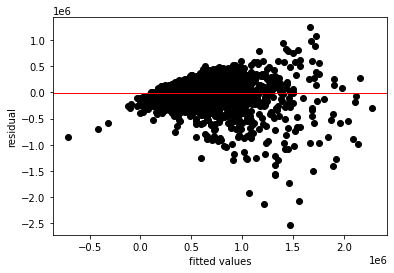

In [66]:
# Visualizing the residuals using a scatter plot 

plt.scatter(ypred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [67]:
# Carrying out Barlett's test 
# It is a more thorough heteroskedasticity test.

test_result, p_value = sp.stats.bartlett(ypred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(ypred)-1
probability = 1 - p_value


critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('The variances are Homogeneous!')

1.296153921894664e-68
The variances are Homogeneous!


#8 lasso  regression

In [68]:
## training the model
lassoReg = Lasso(alpha=0.05, normalize=True)

lassoReg.fit(xtrain,ytrain)

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [69]:
# checking coefficients used by our model, as they indicate how heavily each independent variable contributes to the dependent variable
coef_dict_baseline = {}
for coef, feat in zip(lassoReg.coef_,x.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 105924.9841587062,
 'bedrooms': -3035.319384599384,
 'condition': 25199.099518458144,
 'floors': 16964.745482746253,
 'grade': 160006.81214695942,
 'sqft_living15': 92.19936789559395,
 'view': 50187.13306083176,
 'waterfront': 683027.5168940976,
 'yr_built': -3803.96707390478,
 'yr_renovated': 15.483654593737766,
 'zipcode': 36.15422064816369}

waterfront is the predictor with the highest influence on the dependent variable,followed by grade and the least is yr built...


In [70]:
# predicting and evaluation of the model
ypred = lassoReg.predict(xtest)

print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ypred))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, ypred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))

Mean Absolute Error: 143637.89662592093
Mean Squared Error: 48369434145.14786
Root Mean Squared Error: 219930.52117691137


the  metrics have reduced eg rmse in ridge regression model was 220239.4671608594 in this model it is 219930.52117691137 This means that lasso is better than ridge


In [71]:
# We now create the residual by subtracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(ypred, ytest)


In [72]:
# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

-2430.2762131636787

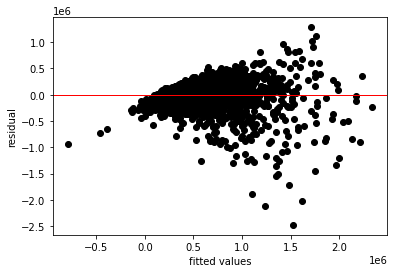

In [73]:
# Visualizing the residuals using a scatter plot 

plt.scatter(ypred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [74]:
# Carrying out Barlett's test 
# It is a more thorough heteroskedasticity test.

test_result, p_value = sp.stats.bartlett(ypred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(ypred)-1
probability = 1 - p_value


critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('The variances are Homogeneous!')

2.1486407465267328e-88
The variances are Homogeneous!


# 9.Elastic net regression

In [75]:
## training the model
Ereg = ElasticNet(alpha=0.05, l1_ratio=0.5, normalize=False)

Ereg.fit(xtrain,ytrain)

ElasticNet(alpha=0.05, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [76]:
# checking coefficients used by our model, as they indicate how heavily each independent variable contributes to the dependent variable
coef_dict_baseline = {}
for coef, feat in zip(Ereg.coef_,x.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 99858.23761222968,
 'bedrooms': -2885.1188480021888,
 'condition': 25057.41695861121,
 'floors': 19934.126488059934,
 'grade': 154028.54586798412,
 'sqft_living15': 99.8162372196427,
 'view': 72275.79664236923,
 'waterfront': 136008.63862870395,
 'yr_built': -3700.662656016656,
 'yr_renovated': 23.571772667126673,
 'zipcode': 42.59731504424451}

grade is the predictor with the highest influence on the price which is our dependent variable,followed by waterfront ....there is a slight difference oberserved in this model as compared with the previous 3 where waterfront was the predictor with the highest influence

In [77]:
# predicting and evaluation of the model
ypred = Ereg.predict(xtest)

print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ypred))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, ypred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))

Mean Absolute Error: 143109.7037743359
Mean Squared Error: 47958574488.89076
Root Mean Squared Error: 218994.4622333879


the metrics have reduce eg rmse in lasso was 219930.52117691137 in this case 
its 218994.4622333879
This means elastic net is performing better than lasso

In [78]:
# We now create the residual by subtracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(ypred, ytest)

In [79]:
# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

-3170.394148521934

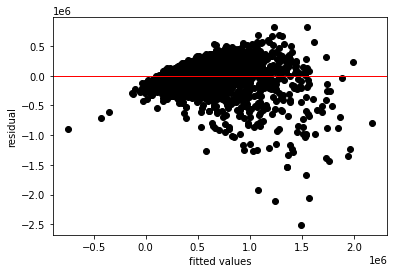

In [80]:
# Visualizing the residuals using a scatter plot 

plt.scatter(ypred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [81]:
# Carrying out Barlett's test 
# It is a more thorough heteroskedasticity test.

test_result, p_value = sp.stats.bartlett(ypred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(ypred)-1
probability = 1 - p_value


critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('The variances are Homogeneous!')

1.8202123794670766e-71
The variances are Homogeneous!


# 10 Quartile regression

In [ ]:
## quantile regression at 0.5 quantile

mod = smf.quantreg('y ~ x',housesm )
res = mod.fit(q=.5)


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [330]:
# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2450
Model:                       QuantReg   Bandwidth:                   2.194e+04
Method:                 Least Squares   Sparsity:                    5.511e+05
Date:                Sat, 21 Nov 2020   No. Observations:                21610
Time:                        17:23:37   Df Residuals:                    21598
                                        Df Model:                           11
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.0859      1.049    -11.517      0.000     -14.143     -10.029
x[0]        -582.4493   1332.666     -0.437      0.662   -3194.573    2029.674
x[1]        3.989e+04   2108.869     18.915      0.000    3.58e+04     4.4e+04
x[2]         3.76e+04   2490.981     15.093      0.0

# Conclusion

My recommendation would be to use the elastic net model as it has the lowest rmse of 218994.4622333879.This means its the best performing as compared to the other models
